### Execute the cell below before proceeding.

The code in this cell will download two files, one with a Python script and another with a jpg image, from the Internet. Make sure that you have a network connection before executing it.  

In [2]:
%config InlineBackend.figure_format = 'retina'
import requests
with open("balloon.jpg", "wb") as f:
    f.write(requests.get("https://git.io/fj5Mx").content)
with open("color_mixing.py", "w") as f:
    f.write(requests.get("https://git.io/fj5My").text)
from color_mixing import *

# Color mixing

## RGB colors

The RGB color model is a method of describing colors. In this model each color is represented as a mixture of three basic colors: red, green, and blue. By varying intensities of these components we can obtain a variety of colors. 

In many computer applications intensities of the red, green, and blue are given by integers 
in the range 0-255, where 0 is the lowest intensity and 255 is the highest. The function `rgb_sliders()` produces an interactive plot which shows the color corresponding to given RGB coordinates:

In [2]:
rgb_sliders()

Loading BokehJS ...

## RGB in an image

Here we import an image file we will be working with:

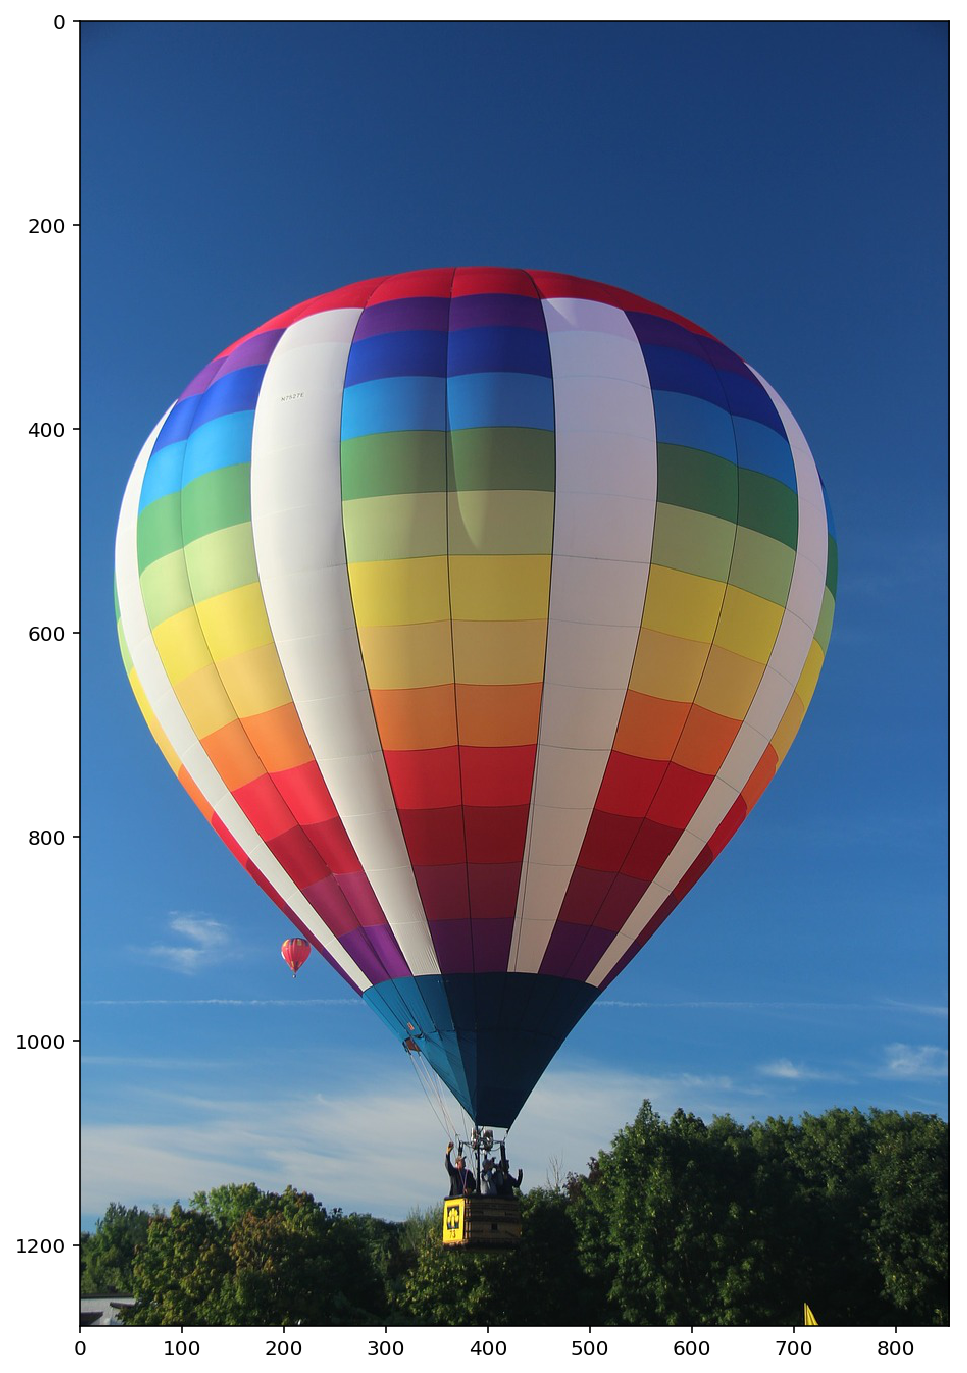

In [7]:
# import image
balloon = plt.imread("balloon.jpg")

# set image size
plt.figure(figsize=(8,12))

#display image
plt.imshow(balloon)
plt.show()

The image is imported as an array of vectors, one vector for each image pixel. Each vector has 3 entries with RGB  coordinates of the pixel color. In the printout below each row shows the RGB vector for one pixel, starting with the pixel in the upper left corner of the image, and ending with the pixel in the lower right corner. 

In [8]:
balloon

array([[[ 30,  62, 109],
        [ 30,  62, 109],
        [ 30,  62, 111],
        ...,
        [ 17,  48,  94],
        [ 17,  48,  94],
        [ 17,  48,  94]],

       [[ 30,  62, 109],
        [ 31,  63, 110],
        [ 31,  63, 112],
        ...,
        [ 19,  47,  94],
        [ 18,  46,  93],
        [ 18,  46,  93]],

       [[ 31,  63, 112],
        [ 31,  63, 112],
        [ 31,  63, 112],
        ...,
        [ 21,  48,  95],
        [ 21,  48,  95],
        [ 20,  47,  94]],

       ...,

       [[ 19,  22,  31],
        [ 19,  22,  31],
        [ 19,  22,  31],
        ...,
        [ 21,  26,  19],
        [ 42,  47,  40],
        [ 43,  49,  39]],

       [[ 18,  23,  29],
        [ 18,  23,  29],
        [ 18,  23,  29],
        ...,
        [ 13,  18,  12],
        [ 24,  29,  22],
        [ 27,  33,  23]],

       [[ 17,  22,  26],
        [ 18,  23,  27],
        [ 18,  23,  27],
        ...,
        [ 15,  20,  14],
        [ 20,  25,  18],
        [ 23,  29,  19]]

## Color mixer

The `color_mixer()` function works as follows. It takes as its arguments a 3x3 matrix $A$ and an array representing an image. For each image pixel it takes the vector 

$$\mathbf{v} = \begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}$$

with RGB coordinates of the pixel, and replaces it with the vector $A\mathbf{v}$, which specifies the new pixel color. Then it displays the image with colors given by the vectors $A\mathbf{v}$:

In [5]:
A = Matrix([[0 , 1.5, 0.5], [0.25, 1, 0.1], [1, 0.3, 0.5]])
A

⎡ 0    1.5  0.5⎤
⎢              ⎥
⎢0.25   1   0.1⎥
⎢              ⎥
⎣ 1    0.3  0.5⎦

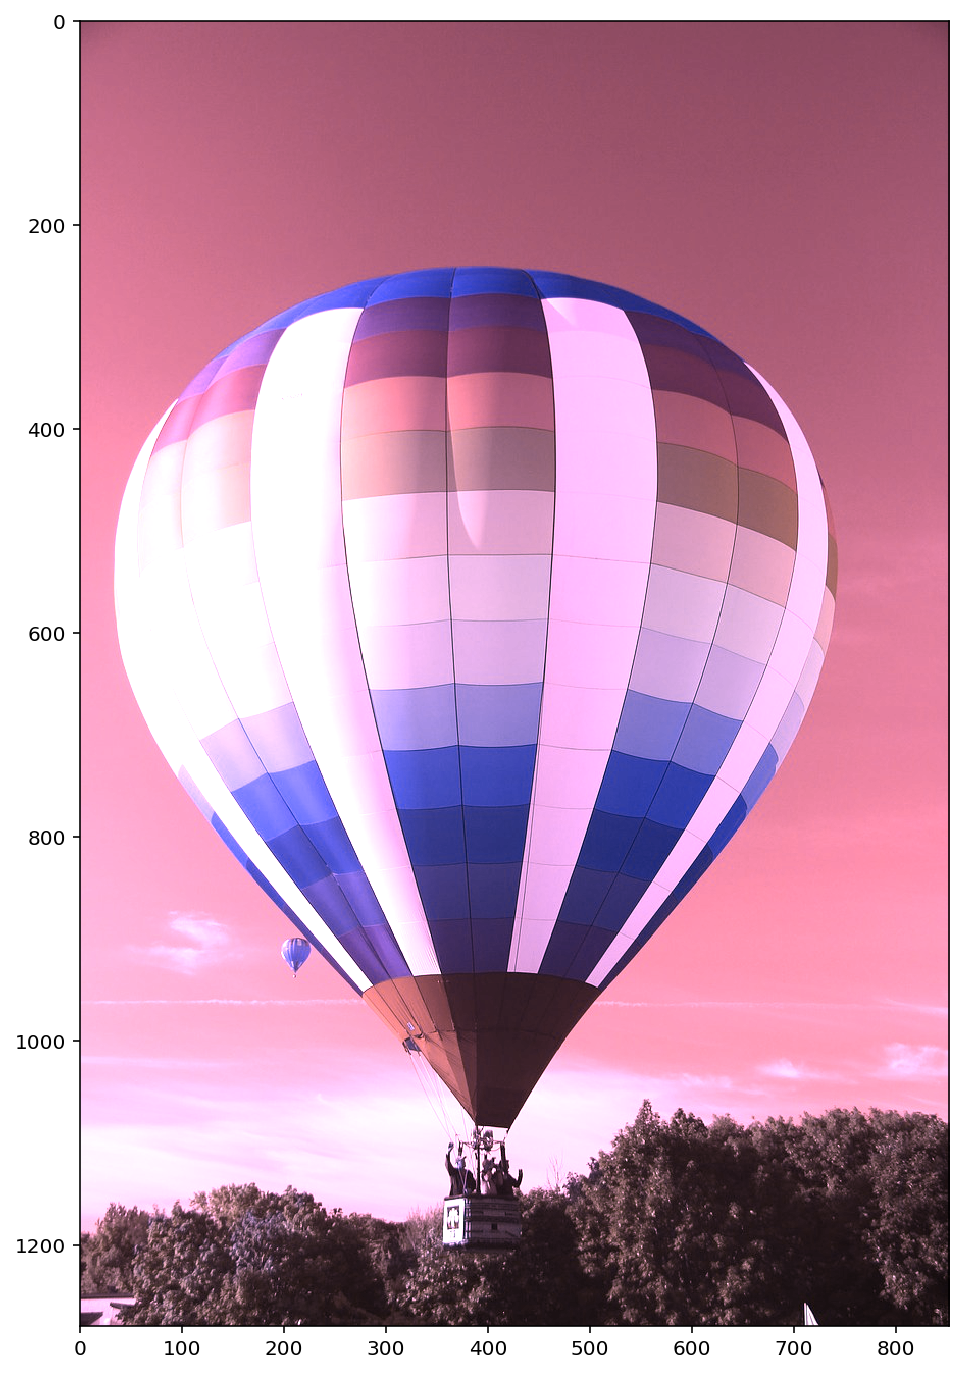

In [6]:
color_mixer(A, balloon)

**Note.** Since valid RGB values are integers between 0 and 255, coordinates of each vector $A\mathbf{v}$
are rounded to the nearest integer in this range. In particular, if $A\mathbf{v}$ has negative coordinates they  are rounded up to 0, and if it has coordinates exceeding 255 they are rounded down to 255. 

## Exercises

In each exercise below find a $3\times 3$ matrix $A$ which transforms colors of image pixels as indicated. Use the function `color_mixer()` to display the resulting image of a balloon. To complete this assignment enter matrices you used in each part into UBx. 

### Exercise 1
The matrix leaves the red component unchanged and sets the other components to 0:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} r \\ 0 \\ 0 \\ \end{bmatrix} $$

### Solution:

In [7]:
B = Matrix([[1,0,0],[0,0,0],[0,0,0]])
B

⎡1  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

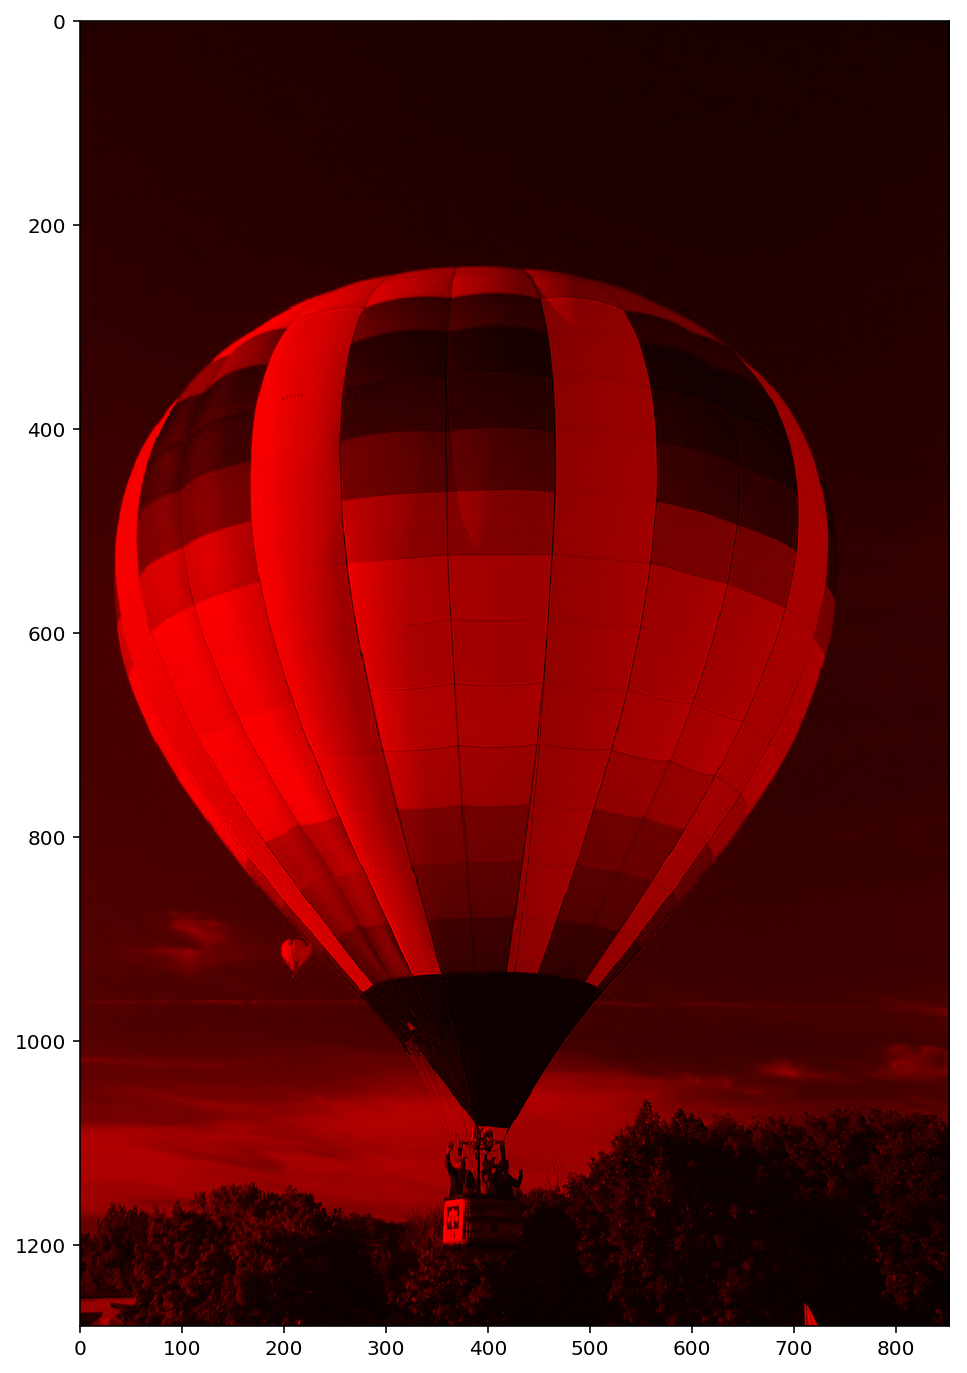

In [35]:
color_mixer(B,balloon)

### Exercise 2.

The matrix interchanges the red component with the blue component:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} b \\ g \\ r \\ \end{bmatrix} $$

### Solution:

In [6]:
C = Matrix([[0,0,1],[0,1,0],[1,0,0]])
C

⎡0  0  1⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣1  0  0⎦

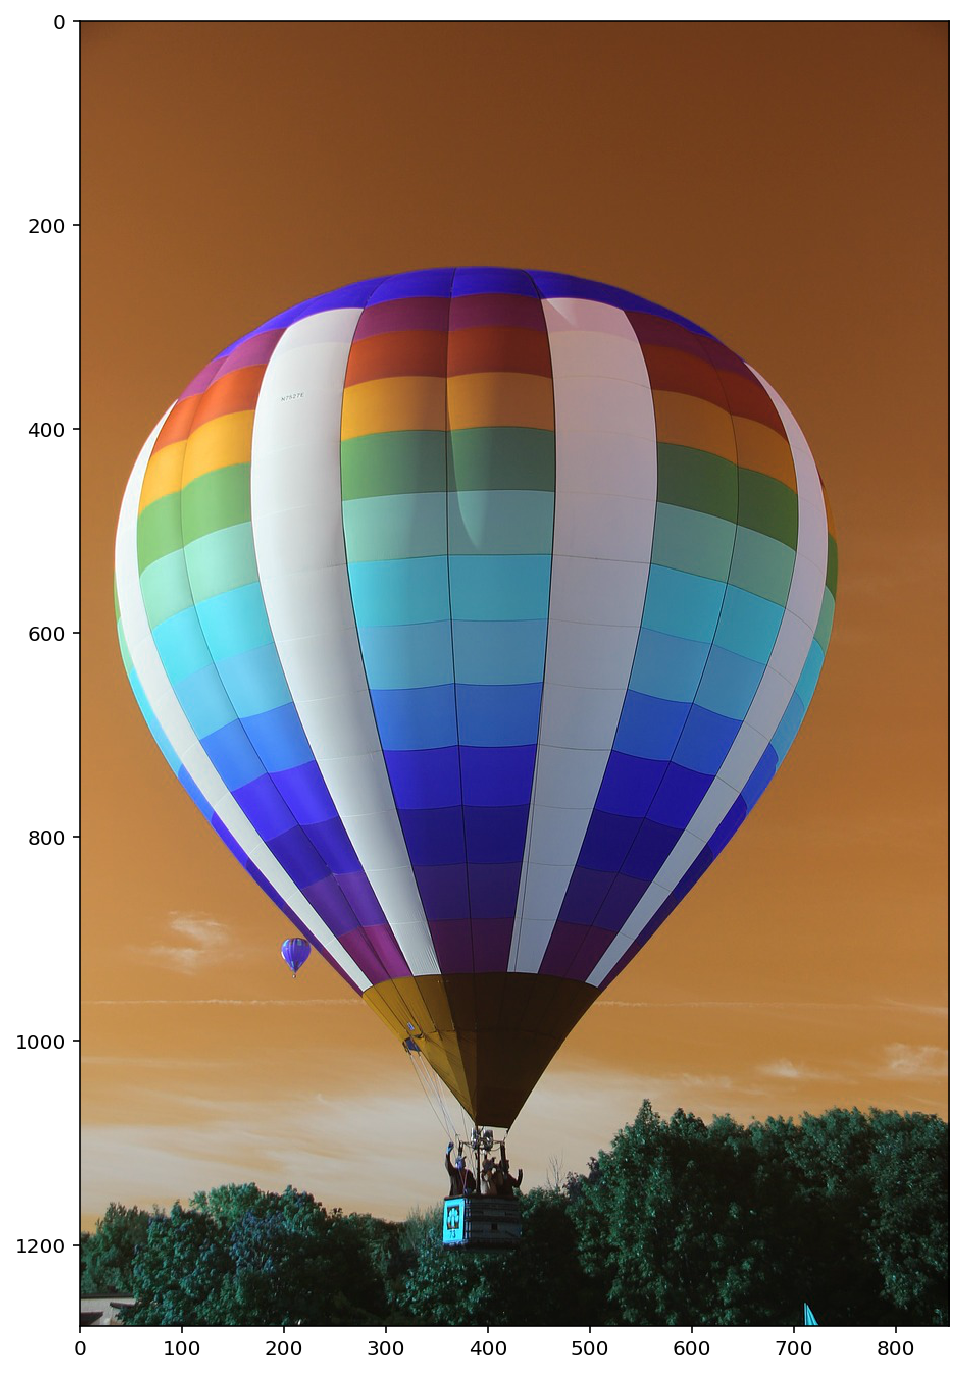

In [7]:
color_mixer(C, balloon)

### Exercise 3.
The matrix divides all components by 2:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} \frac{1}{2}r \\ \frac{1}{2}g \\ \frac{1}{2}b \\ \end{bmatrix} $$

### Solution:

In [30]:
D = Matrix([[1/2,0,0],[0,1/2,0],[0,0,1/2]])
D

⎡0.5   0    0 ⎤
⎢             ⎥
⎢ 0   0.5   0 ⎥
⎢             ⎥
⎣ 0    0   0.5⎦

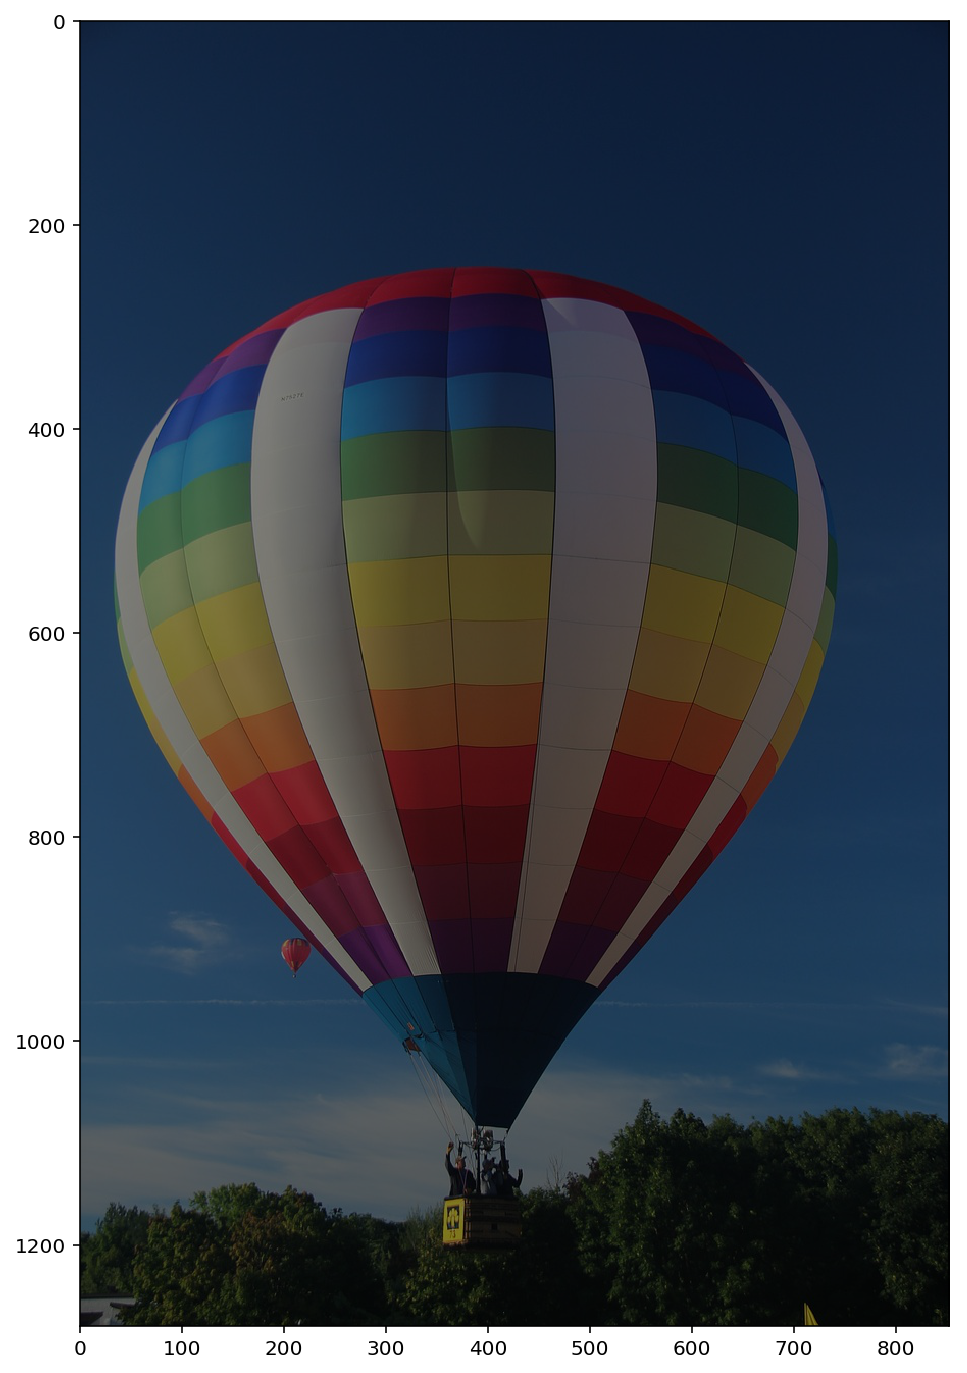

In [31]:
color_mixer(D,balloon)

### Exercise 4.
The matrix replaces all components by their average:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} \dfrac{r+g+b}{3} \\[1mm] \dfrac{r+g+b}{3} \\[1mm] \dfrac{r+g+b}{3} \\ \end{bmatrix} $$

### Solution:

In [9]:
E = Matrix([[Rational(1,3),Rational(1,3),Rational(1,3)],[Rational(1,3),Rational(1,3),Rational(1,3)],[Rational(1,3),Rational(1,3),Rational(1,3)]])
E

⎡1/3  1/3  1/3⎤
⎢             ⎥
⎢1/3  1/3  1/3⎥
⎢             ⎥
⎣1/3  1/3  1/3⎦

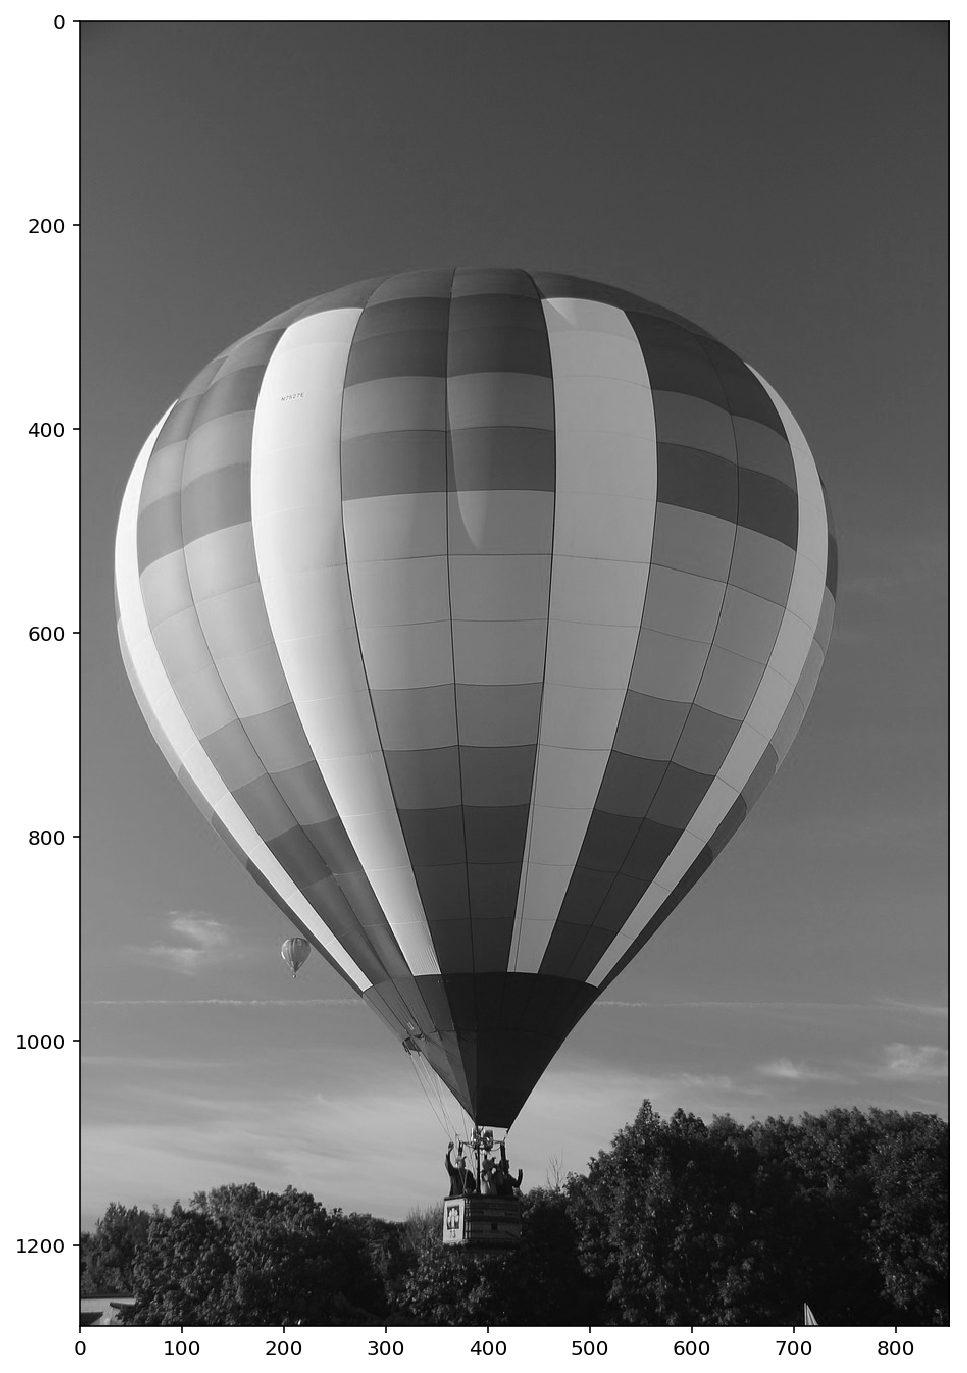

In [10]:
color_mixer(E,balloon)